## Importing all files and check files

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df_abusive = pd.read_csv("/content/abusive.csv")

In [ ]:
df_data = pd.read_csv("/content/data.csv",encoding='latin-1')

In [ ]:
df_abusive.head()

,ABUSIVE
0,alay
1,ampas
2,buta
3,keparat
4,anjing


In [ ]:
df_data.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0


## Cleansing df_data

In [ ]:
df_data.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0


In [ ]:
# apply column total_word and total_char
df_data['total_char']=df_data.Tweet.apply(len)
df_data['total_word']= df_data.Tweet.apply(lambda x: len(x.split()))

In [ ]:
df_data["Tweet"].head()

0    - disaat semua cowok berusaha melacak perhatia...
1    RT USER: USER siapa yang telat ngasih tau elu?...
2    41. Kadang aku berfikir, kenapa aku tetap perc...
3    USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...
4    USER USER Kaum cebong kapir udah keliatan dong...
Name: Tweet, dtype: object

In [ ]:
df_stopwords = pd.read_csv("/content/stopwordbahasa.csv", header=None)

In [ ]:
# importing stopwords
df_stopwords=df_stopwords.rename(columns={0: 'stopword'})
df_stopwords.head()

,stopword
0,ada
1,adalah
2,adanya
3,adapun
4,agak


In [ ]:
# lower case all value
df_data["Tweet"].str.lower()

0        - disaat semua cowok berusaha melacak perhatia...
1        rt user: user siapa yang telat ngasih tau elu?...
2        41. kadang aku berfikir, kenapa aku tetap perc...
3        user user aku itu aku\n\nku tau matamu sipit t...
4        user user kaum cebong kapir udah keliatan dong...
                               ...                        
13164    user jangan asal ngomong ndasmu. congor lu yg ...
13165                         user kasur mana enak kunyuk'
13166    user hati hati bisu :( .g\n\nlagi bosan huft \...
13167    user user user user bom yang real mudah terdet...
13168    user mana situ ngasih(": itu cuma foto ya kuti...
Name: Tweet, Length: 13169, dtype: object

In [ ]:
# import kamusalay.csv for cleaning data
df_kamusalay=pd.read_csv("/content/new_kamusalay.csv", encoding="latin-1", header= None)
df_kamusalay=df_kamusalay.rename(columns={0: 'original',
                                      1: 'replacement'})

In [ ]:
df_kamusalay.head()

,original,replacement
0,anakjakartaasikasik,anak jakarta asyik asyik
1,pakcikdahtua,pak cik sudah tua
2,pakcikmudalagi,pak cik muda lagi
3,t3tapjokowi,tetap jokowi
4,3x,tiga kali


In [ ]:
# import regEx
import re

# custom functional for preprocess data

# lower case all data
def lowercase_data (text):
  return text.lower()

# remove unnecessary character
def remove_unnecessary_char(text):
    text = re.sub('\n',' ',text) # Remove every '\n'
    text = re.sub('rt',' ',text) # Remove every retweet symbol
    text = re.sub('user',' ',text) # Remove every username
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',text) # Remove every URL
    text = re.sub('  +', ' ', text) # Remove extra spaces
    return text

# remove characters and numbers
def remove_nonaplhanumeric(text):
    text = re.sub('[^0-9a-zA-Z]+', ' ', text)
    return text
# remove stopwords
def remove_stopword(text):
    text = ' '.join(['' if word in df_stopwords.stopword.values else word for word in text.split(' ')])
    text = re.sub('  +', ' ', text) # Remove extra spaces
    text = text.strip()
    return text

# normalize "alay" word
alay_dict_map = dict(zip(df_kamusalay['original'], df_kamusalay['replacement']))
def normalize_alay(text):
    return ' '.join([alay_dict_map[word] if word in alay_dict_map else word for word in text.split(' ')])

In [ ]:
# check all function
print("remove_nonaplhanumeric: ", remove_nonaplhanumeric("Halooo,,,,, duniaa!!"))
print("lowercase: ", lowercase_data("Halooo, duniaa!"))
print("remove_unnecessary_char: ", remove_unnecessary_char("Hehe\n\n RT USER USER apa kabs www.google.com\n  hehe"))
print("normalize_alay: ", normalize_alay("aamiin adek abis"))
print("remove_stopword: ", remove_stopword("ada hehe adalah huhu yang hehe"))

remove_nonaplhanumeric:  Halooo duniaa 
lowercase:  halooo, duniaa!
remove_unnecessary_char:  Hehe RT USER USER apa kabs hehe
normalize_alay:  amin adik habis
remove_stopword:  hehe huhu hehe


In [ ]:
# apply all function
def preprocess(text):
    text = lowercase_data(text) # 1
    text = remove_nonaplhanumeric(text) # 2
    text = remove_unnecessary_char(text) # 2
    text = normalize_alay(text) # 3
    text = remove_stopword(text) # 5
    return text

In [ ]:
df_data['Tweet'] = df_data['Tweet'].apply(preprocess)

In [ ]:
df_data.head(20)

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,total_char,total_word
0,cowok berusaha melacak perhatian gue lantas re...,1,1,1,0,0,0,0,0,1,1,0,0,138,25
1,telat tau edan sarap gue bergaul cigax jifla c...,0,1,0,0,0,0,0,0,0,0,0,0,120,21
2,41 kadang berpikir percaya tuhan jatuh berkali...,0,0,0,0,0,0,0,0,0,0,0,0,254,37
3,ku tau matamu sipit,0,0,0,0,0,0,0,0,0,0,0,0,75,14
4,kaum cebong kafir dongoknya dungu haha,1,1,0,1,1,0,0,0,0,0,1,0,89,14
5,ya bani taplak kawan kawan xf0 x9f x98 x84 xf0...,1,1,0,1,0,0,0,0,1,0,1,0,73,6
6,deklarasi pilihan kepala daerah 2018 aman anti...,0,0,0,0,0,0,0,0,0,0,0,0,64,11
7,gue selesai re watch aldnoah zero kampret 2 ka...,0,1,0,0,0,0,0,0,0,0,0,0,129,20
8,admin belanja po terbaik nak makan ais kepal m...,0,0,0,0,0,0,0,0,0,0,0,0,231,42
9,enak ngewe,0,1,0,0,0,0,0,0,0,0,0,0,29,6


### Exploratory Data Analysis

In [ ]:
# mean for df_data
df_data.mean()

<ipython-input-19-135973464c31>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_data.mean()


HS                 0.422280
Abusive            0.382945
HS_Individual      0.271471
HS_Group           0.150809
HS_Religion        0.060217
HS_Race            0.042980
HS_Physical        0.024527
HS_Gender          0.023236
HS_Other           0.284000
HS_Weak            0.256891
HS_Moderate        0.129471
HS_Strong          0.035918
total_char       114.202749
total_word        17.282102
dtype: float64

In [ ]:
# median for df_data

df_data.median()

<ipython-input-20-92a9132adc28>:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_data.median()


HS                 0.0
Abusive            0.0
HS_Individual      0.0
HS_Group           0.0
HS_Religion        0.0
HS_Race            0.0
HS_Physical        0.0
HS_Gender          0.0
HS_Other           0.0
HS_Weak            0.0
HS_Moderate        0.0
HS_Strong          0.0
total_char       100.0
total_word        15.0
dtype: float64

In [ ]:
# mode for total char and total word

print('Mode total char: {}'.format(df_data['total_char'].mode()))
print('Mode total word: {}'.format(df_data['total_word'].mode()))

Mode total char: 0    254
Name: total_char, dtype: int64
Mode total word: 0    11
Name: total_word, dtype: int64


In [ ]:
# spread for total char and total word

range_total_char = df_data.total_char.max() - df_data.total_char.min()
print('spread for total char: {}'.format(range_total_char))
range_total_word = df_data.total_word.max() - df_data.total_word.min()
print('spread for total word: {}'.format(range_total_word))

spread for total char: 557
spread for total word: 51


In [ ]:
#quartile dan interquartile range for total char

#cari nilai minimum
p0_char = df_data.total_char.min()

#cari nilai maximum
p100_char = df_data.total_char.max()

#cari quartile 1
q1_char = df_data.total_char.quantile(0.25)

#cari quartile 2
q2_char = df_data.total_char.quantile(0.5)

#cari quartile 3
q3_char = df_data.total_char.quantile(0.75)

#cari IQR
iqr_char = q3_char - q1_char

#cari batas bawah
lower_limit_char = q1_char - 1.5 * iqr_char

#cari batas atas
upper_limit_char = q3_char + 1.5 * iqr_char

In [ ]:
print("batas bawah (minimum) total_char : ", lower_limit_char)
print("nilai terkecil :", p0_char)

if lower_limit_char < p0_char:
  print("tidak ada outlier dari sisi batas bawah")
else:
  print("ada outlier dari sisi batas bawah")

print()

print("batas atas (maximum) total_char : ", upper_limit_char)
print("nilai terbesar", p100_char)

if upper_limit_char > p100_char:
  print("tidak ada outlier dari sisi batas atas")
else:
  print("ada outlier dari sisi batas atas")

batas bawah (minimum) total_char :  -80.5
nilai terkecil : 4
tidak ada outlier dari sisi batas bawah

batas atas (maximum) total_char :  291.5
nilai terbesar 561
ada outlier dari sisi batas atas


In [ ]:
#quartile dan interquartile range for total word

#cari nilai minimum
p0_word = df_data.total_word.min()

#cari nilai maximum
p100_word = df_data.total_word.max()

#cari quartile 1
q1_word = df_data.total_word.quantile(0.25)

#cari quartile 2
q2_word = df_data.total_word.quantile(0.5)

#cari quartile 3
q3_word = df_data.total_word.quantile(0.75)

#cari IQR
iqr_word = q3_word - q1_word

#cari batas bawah
lower_limit_word = q1_word - 1.5 * iqr_word

#cari batas atas
upper_limit_word = q3_word + 1.5 * iqr_word

In [ ]:
print("batas bawah (minimum) total_word : ", lower_limit_word)
print("nilai terkecil :", p0_word)

if lower_limit_word < p0_char:
  print("tidak ada outlier dari sisi batas bawah")
else:
  print("ada outlier dari sisi batas bawah")

print()

print("batas atas (maximum) total_word : ", upper_limit_word)
print("nilai terbesar", p100_word)

if upper_limit_word > p100_word:
  print("tidak ada outlier dari sisi batas atas")
else:
  print("ada outlier dari sisi batas atas")

batas bawah (minimum) total_word :  -12.0
nilai terkecil : 1
tidak ada outlier dari sisi batas bawah

batas atas (maximum) total_word :  44.0
nilai terbesar 52
ada outlier dari sisi batas atas


In [ ]:
# variance and standard deviation
print(df_data.var())

HS                  0.243978
Abusive             0.236316
HS_Individual       0.197789
HS_Group            0.128075
HS_Religion         0.056595
HS_Race             0.041136
HS_Physical         0.023928
HS_Gender           0.022698
HS_Other            0.203360
HS_Weak             0.190913
HS_Moderate         0.112717
HS_Strong           0.034630
total_char       4771.441271
total_word        104.693271
dtype: float64


<ipython-input-27-8efa3a10b873>:2: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df_data.var())


In [ ]:
# standard deviation
print(df_data.std())

HS                0.493941
Abusive           0.486123
HS_Individual     0.444735
HS_Group          0.357876
HS_Religion       0.237898
HS_Race           0.202819
HS_Physical       0.154685
HS_Gender         0.150659
HS_Other          0.450954
HS_Weak           0.436935
HS_Moderate       0.335733
HS_Strong         0.186092
total_char       69.075620
total_word       10.231973
dtype: float64


<ipython-input-28-4decd517e25c>:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df_data.std())


In [ ]:
df_data.describe()

,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,total_char,total_word
count,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000
mean,0.422280,0.382945,0.271471,0.150809,0.060217,0.042980,0.024527,0.023236,0.284000,0.256891,0.129471,0.035918,114.202749,17.282102
std,0.493941,0.486123,0.444735,0.357876,0.237898,0.202819,0.154685,0.150659,0.450954,0.436935,0.335733,0.186092,69.075620,10.231973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59.000000,9.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,15.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,152.000000,23.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,561.000000,52.000000


In [ ]:
df_data.skew()

<ipython-input-30-7ccd5dcb7967>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_data.skew()


HS               0.314743
Abusive          0.481659
HS_Individual    1.027865
HS_Group         1.951762
HS_Religion      3.697803
HS_Race          4.507363
HS_Physical      6.148549
HS_Gender        6.329997
HS_Other         0.958113
HS_Weak          1.112960
HS_Moderate      2.207621
HS_Strong        4.988423
total_char       0.693625
total_word       0.786909
dtype: float64

In [ ]:
df_data.kurtosis()

<ipython-input-31-9576311ef0ec>:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_data.kurtosis()


HS               -1.901226
Abusive          -1.768273
HS_Individual    -0.943638
HS_Group          1.809650
HS_Religion      11.675521
HS_Race          18.319105
HS_Physical      35.810092
HS_Gender        38.074647
HS_Other         -1.082184
HS_Weak          -0.761437
HS_Moderate       2.874027
HS_Strong        22.887838
total_char       -0.401174
total_word       -0.149516
dtype: float64

<Axes: title={'center': 'Abusive Tweets'}, ylabel='Abusive'>

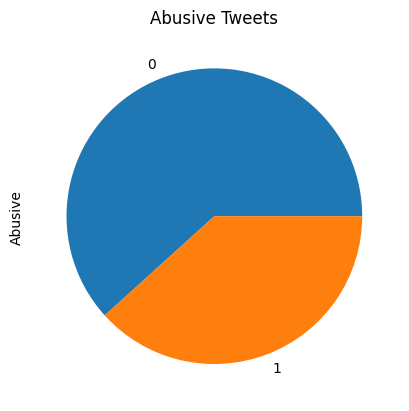

In [ ]:
df_data.groupby('Abusive').Abusive.count().plot(kind ="pie", title='Abusive Tweets')

In [ ]:
df_data_edit= df_data.copy()

df_data_edit['Abusive']=df_data_edit['Abusive'].replace([1,0],['abusive','not_abusive'])

In [ ]:
df_data_edit.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,total_char,total_word
0,cowok berusaha melacak perhatian gue lantas re...,1,abusive,1,0,0,0,0,0,1,1,0,0,138,25
1,telat tau edan sarap gue bergaul cigax jifla c...,0,abusive,0,0,0,0,0,0,0,0,0,0,120,21
2,41 kadang berpikir percaya tuhan jatuh berkali...,0,not_abusive,0,0,0,0,0,0,0,0,0,0,254,37
3,ku tau matamu sipit,0,not_abusive,0,0,0,0,0,0,0,0,0,0,75,14
4,kaum cebong kafir dongoknya dungu haha,1,abusive,0,1,1,0,0,0,0,0,1,0,89,14


<Axes: title={'center': 'Abusive Tweets'}, ylabel='Abusive'>

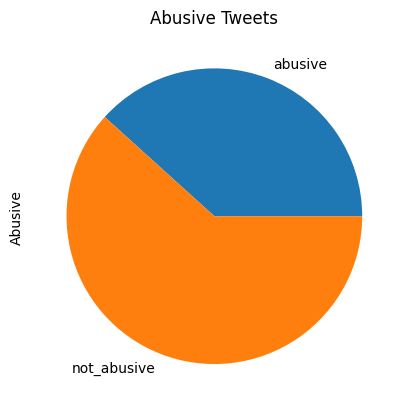

In [ ]:
df_data_edit.groupby('Abusive').Abusive.count().plot(kind ="pie", title='Abusive Tweets')

In [ ]:
df_data_edit['Abusive'].value_counts(normalize = True)

not_abusive    0.617055
abusive        0.382945
Name: Abusive, dtype: float64

<Axes: >

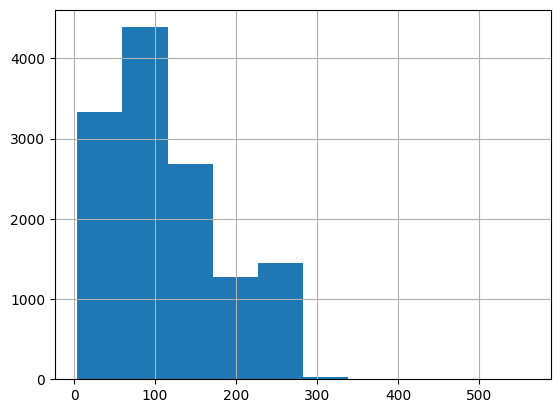

In [ ]:
# visualize total char Histogram
df_data_edit.total_char.hist()

<Axes: >

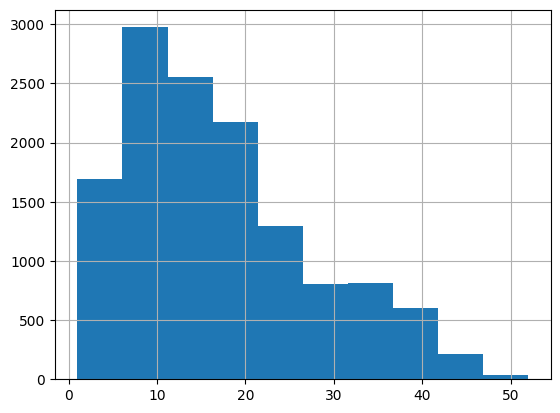

In [ ]:
# visualize total word histogram
df_data_edit.total_word.hist()

<Axes: >

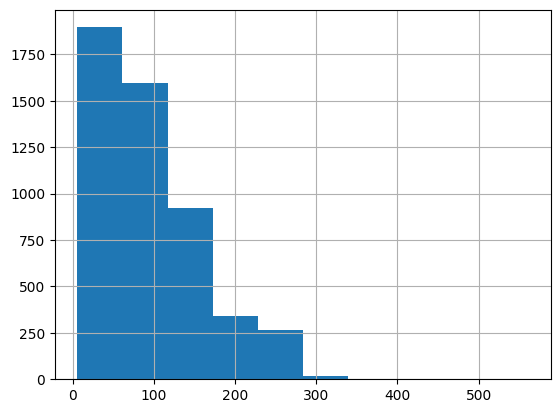

In [ ]:
df_abusive = df_data_edit.loc[df_data_edit['Abusive']=='abusive']
df_abusive.total_char.hist()


<Axes: >

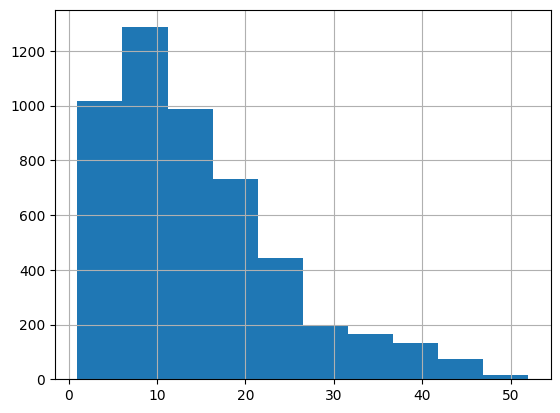

In [ ]:
df_abusive.total_word.hist()

In [ ]:
df_not_abusive = df_data_edit.loc[df_data_edit['Abusive']=='not_abusive']

<Axes: >

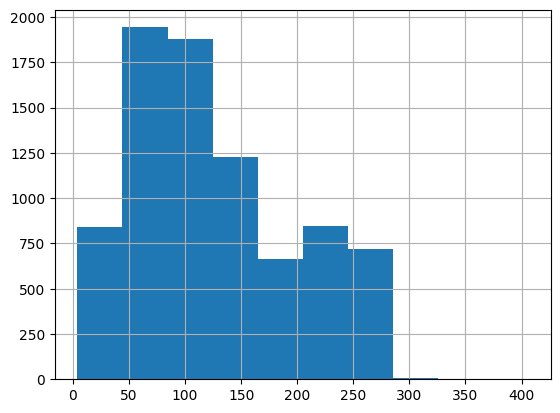

In [ ]:
df_not_abusive.total_char.hist()

<Axes: >

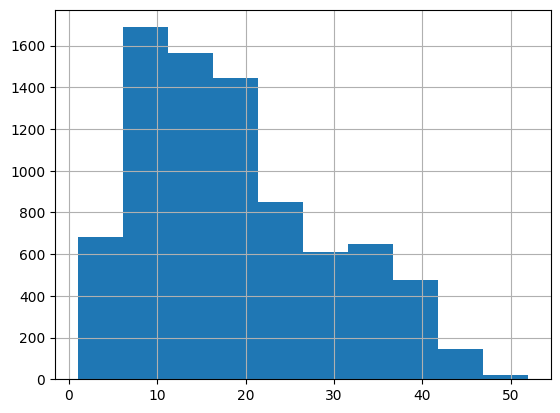

In [ ]:
df_not_abusive.total_word.hist()

#### Wordcloud

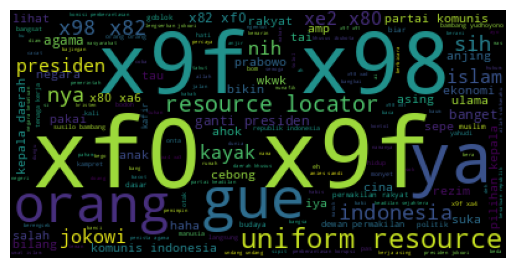

In [ ]:
from wordcloud import WordCloud
text = ' '.join(df_data_edit['Tweet'])
wordcloud = WordCloud().generate(text)

#Generate Plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

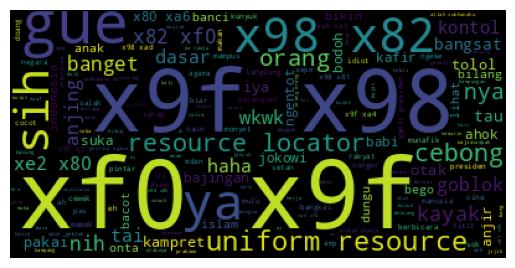

In [ ]:
text = ' '.join(df_abusive['Tweet'])
wordcloud = WordCloud().generate(text)

#Generate Plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

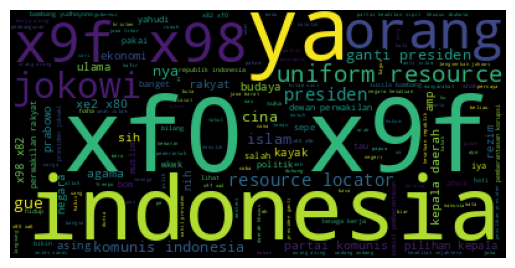

In [ ]:
text = ' '.join(df_not_abusive['Tweet'])
wordcloud = WordCloud().generate(text)

#Generate Plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Bivariate Analysis

In [ ]:
corr = df_data_edit.corr()
corr.style.background_gradient(cmap ='coolwarm')

<ipython-input-49-a361844d0ac6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_data_edit.corr()


,HS,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,total_char,total_word
HS,1.000000,0.713998,0.492912,0.296077,0.247873,0.185471,0.180405,0.736651,0.687713,0.451079,0.225765,-0.148950,-0.129296
HS_Individual,0.713998,1.000000,-0.257246,0.035690,-0.000549,0.213400,0.182398,0.637545,0.963186,-0.235414,0.058354,-0.140994,-0.119682
HS_Group,0.492912,-0.257246,1.000000,0.364294,0.342798,-0.009207,0.022328,0.224446,-0.247776,0.915132,0.239084,-0.030366,-0.029724
HS_Religion,0.296077,0.035690,0.364294,1.000000,0.095878,-0.002993,0.024522,-0.159422,0.035277,0.343558,0.083226,-0.005674,0.003535
HS_Race,0.247873,-0.000549,0.342798,0.095878,1.000000,-0.028763,-0.020260,-0.133467,-0.007199,0.239469,0.242798,-0.057099,-0.048548
HS_Physical,0.185471,0.213400,-0.009207,-0.002993,-0.028763,1.000000,0.053750,-0.099867,0.220254,0.000265,-0.025330,-0.043721,-0.035512
HS_Gender,0.180405,0.182398,0.022328,0.024522,-0.020260,0.053750,1.000000,-0.097139,0.189647,0.029100,-0.018936,-0.024621,-0.017160
HS_Other,0.736651,0.637545,0.224446,-0.159422,-0.133467,-0.099867,-0.097139,1.000000,0.606733,0.225106,0.124581,-0.110261,-0.102027
HS_Weak,0.687713,0.963186,-0.247776,0.035277,-0.007199,0.220254,0.189647,0.606733,1.000000,-0.226747,-0.113487,-0.131945,-0.108991
HS_Moderate,0.451079,-0.235414,0.915132,0.343558,0.239469,0.000265,0.029100,0.225106,-0.226747,1.000000,-0.074437,-0.004878,-0.006985


<Axes: xlabel='total_char', ylabel='total_word'>

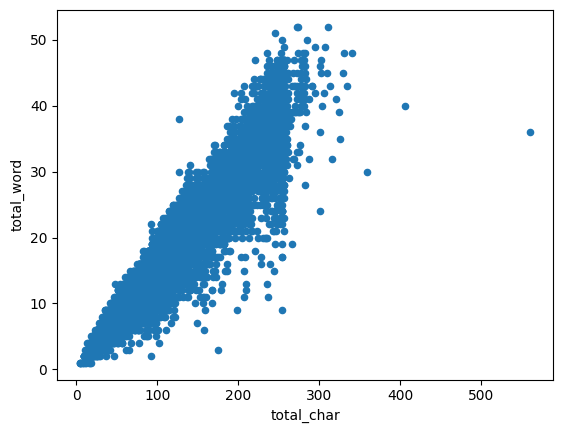

In [ ]:
df_data_edit.plot(x='total_char', y='total_word', kind='scatter')

<Axes: xlabel='HS_Weak', ylabel='HS_Individual'>

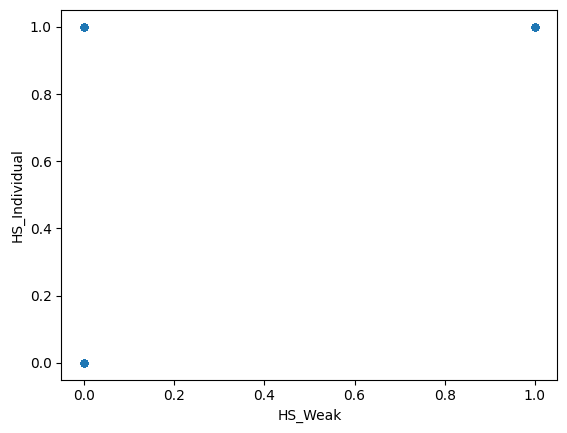

In [ ]:
df_data_edit.plot(x='HS_Weak', y='HS_Individual', kind='scatter')

<Axes: xlabel='HS_Moderate', ylabel='HS_Group'>

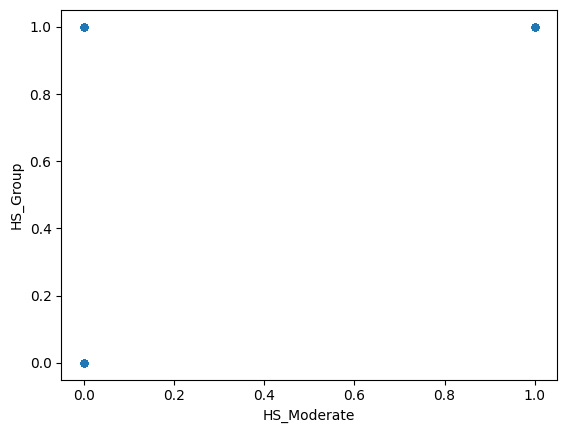

In [ ]:
df_data_edit.plot(x='HS_Moderate', y='HS_Group', kind='scatter')